## ConvConvPool with data augmentation

Following up with the better results on the conv-conv-pool architecture without augmentation, I decided to try this out by augmenting the dataset with a zoom factor of 0.3, just like in the convpool model.

In [2]:
import matplotlib.pyplot as plt

In [3]:
from convconvpool import Convtrain as conv
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=0.,
      width_shift_range=0.,
      height_shift_range=0.,
      shear_range=0.,
      zoom_range=0.3,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('dataset/', target_size = (128,1024), batch_size = 20, 
                                                    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('validation/', target_size = (128,1024), batch_size =20,
                                                       class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory('test/', target_size = (128,1024), batch_size = 20,
                                                 class_mode = 'categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Model = conv(input_shape=(128,1024,3))
Model.compile()
print(Model.model.summary())
history = Model.fit_generator(train_generator, validation_generator, epochs=20)

Found 6394 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
data batch shape: (20, 128, 1024, 3)
labels batch shape: (20, 8)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 512, 32)       416       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 256, 32)       4128      
                                                                 
 batch_normalization (BatchN  (None, 32, 256, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 128, 32)      0         
 )                                                               
                                                                 

c:\src\repos\Music-Genre-Analysis\Notebooks\convconvpool.py:69: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = self.model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=40)


Epoch 1/20
319/319 [==============================] - 190s 594ms/step - loss: 2.3507 - accuracy: 0.1941 - val_loss: 2.6028 - val_accuracy: 0.1963
Epoch 2/20
319/319 [==============================] - 188s 590ms/step - loss: 2.1676 - accuracy: 0.2275 - val_loss: 2.2362 - val_accuracy: 0.2463
Epoch 3/20
319/319 [==============================] - 186s 583ms/step - loss: 2.0622 - accuracy: 0.2444 - val_loss: 3.8232 - val_accuracy: 0.1787
Epoch 4/20
319/319 [==============================] - 193s 605ms/step - loss: 1.9933 - accuracy: 0.2667 - val_loss: 2.2824 - val_accuracy: 0.2400
Epoch 5/20
319/319 [==============================] - 190s 595ms/step - loss: 1.9724 - accuracy: 0.2557 - val_loss: 1.9489 - val_accuracy: 0.2862
Epoch 6/20
319/319 [==============================] - 184s 577ms/step - loss: 1.9083 - accuracy: 0.2879 - val_loss: 2.1934 - val_accuracy: 0.2450
Epoch 7/20
319/319 [==============================] - 177s 555ms/step - loss: 1.8794 - accuracy: 0.2888 - val_loss: 2.0986 -

In [4]:
a = history.history

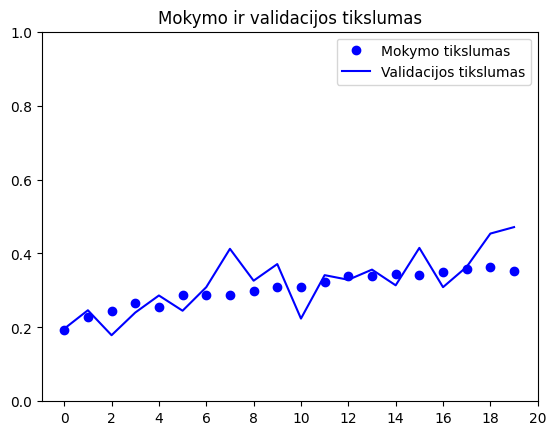

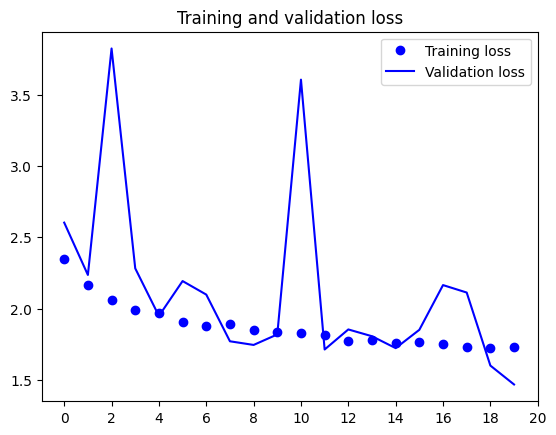

In [5]:
acc = a['accuracy']
val_acc = a['val_accuracy']
loss = a['loss']
val_loss = a['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
ax = plt.gca()
ax.set_ylim(0,1)
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
ax = plt.gca()
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend()

plt.show()


This looks better. Aside from the anomalous validation loss - The validation accuracies and losses are getting better. I shall run this on a larger amount of epochs to continue training and maybe increase the number of batches to train on.